In [4]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [5]:
cd C:\Users\Marcus\Desktop\python\alf_sports_betting_predictor\data

C:\Users\Marcus\Desktop\python\alf_sports_betting_predictor\data


In [8]:
df = pd.read_csv('2021_2020_afl_season_and_stats.csv')

In [9]:
df

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,home_Team,away_Team,home_Kicks,away_Kicks,home_Handballs,...,home_Frees_For,away_Frees_For,home_Frees_Against,away_Frees_Against,home_Goals,away_Goals,home_Behinds,away_Behinds,home_AFL_Fantasy,away_AFL_Fantasy
0,0,Richmond,105,Carlton,81,Richmond,Carlton,0.241758,0.842033,0.534269,...,0.000000,0.655172,0.990991,0.594595,0.715789,0.663158,0.816901,0.746479,0.059970,0.562594
1,1,Western Bulldogs,34,Collingwood,86,Western Bulldogs,Collingwood,0.440934,0.469780,1.000000,...,0.551724,0.560345,0.099099,0.423423,1.000000,0.463158,1.000000,0.000000,1.000000,0.718891
2,2,Essendon,63,Fremantle,57,Essendon,Fremantle,0.254121,0.282967,0.728324,...,0.275862,0.387931,0.621622,0.477477,0.778947,0.336842,0.352113,0.760563,0.564468,0.146552
3,3,Adelaide Crows,71,Sydney Swans,74,Adelaide Crows,Sydney Swans,0.000000,0.725275,0.459950,...,1.000000,0.853448,0.441441,0.558559,0.652632,0.968421,0.971831,0.802817,0.000000,0.671289
4,4,GWS Giants,105,Geelong Cats,73,GWS Giants,Geelong Cats,0.469780,0.645604,0.535921,...,0.818966,0.146552,0.630631,1.000000,0.494737,0.726316,0.154930,0.380282,0.357571,0.929160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,31,Gold Coast Suns,59,Carlton,70,Gold Coast Suns,Carlton,1.000000,0.842033,0.170107,...,0.327586,0.655172,0.405405,0.594595,0.452632,0.663158,0.704225,0.746479,0.887556,0.562594
185,32,Collingwood,60,GWS Giants,90,Collingwood,GWS Giants,0.469780,0.469780,0.580512,...,0.560345,0.818966,0.423423,0.630631,0.463158,0.494737,0.000000,0.154930,0.718891,0.357571
186,33,North Melbourne,68,Adelaide Crows,109,North Melbourne,Adelaide Crows,0.086538,0.000000,0.572254,...,0.870690,1.000000,0.702703,0.441441,0.000000,0.652632,0.070423,0.971831,0.034108,0.000000
187,34,Melbourne,85,Geelong Cats,60,Melbourne,Geelong Cats,0.627747,0.645604,0.469860,...,0.327586,0.146552,0.360360,1.000000,0.736842,0.726316,0.957746,0.380282,0.824963,0.929160


In [11]:
mask = df['Home_Team_Score'] > df['Away_Team_Score']
mask_lose = df['Home_Team_Score'] < df['Away_Team_Score']
mask_draw = df['Home_Team_Score'] == df['Away_Team_Score']
df.loc[mask, "home_win_lose"] = 1
df.loc[mask, "away_win_lose"] = 0
df.loc[mask_lose, "home_win_lose"] = 0
df.loc[mask_lose, "away_win_lose"] = 1
df.loc[mask_draw, "home_win_lose"] = 0
df.loc[mask_draw, "away_win_lose"] = 0

In [12]:
df

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,home_Team,away_Team,home_Kicks,away_Kicks,home_Handballs,...,home_Frees_Against,away_Frees_Against,home_Goals,away_Goals,home_Behinds,away_Behinds,home_AFL_Fantasy,away_AFL_Fantasy,home_win_lose,away_win_lose
0,0,Richmond,105,Carlton,81,Richmond,Carlton,0.241758,0.842033,0.534269,...,0.990991,0.594595,0.715789,0.663158,0.816901,0.746479,0.059970,0.562594,1.0,0.0
1,1,Western Bulldogs,34,Collingwood,86,Western Bulldogs,Collingwood,0.440934,0.469780,1.000000,...,0.099099,0.423423,1.000000,0.463158,1.000000,0.000000,1.000000,0.718891,0.0,1.0
2,2,Essendon,63,Fremantle,57,Essendon,Fremantle,0.254121,0.282967,0.728324,...,0.621622,0.477477,0.778947,0.336842,0.352113,0.760563,0.564468,0.146552,1.0,0.0
3,3,Adelaide Crows,71,Sydney Swans,74,Adelaide Crows,Sydney Swans,0.000000,0.725275,0.459950,...,0.441441,0.558559,0.652632,0.968421,0.971831,0.802817,0.000000,0.671289,0.0,1.0
4,4,GWS Giants,105,Geelong Cats,73,GWS Giants,Geelong Cats,0.469780,0.645604,0.535921,...,0.630631,1.000000,0.494737,0.726316,0.154930,0.380282,0.357571,0.929160,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,31,Gold Coast Suns,59,Carlton,70,Gold Coast Suns,Carlton,1.000000,0.842033,0.170107,...,0.405405,0.594595,0.452632,0.663158,0.704225,0.746479,0.887556,0.562594,0.0,1.0
185,32,Collingwood,60,GWS Giants,90,Collingwood,GWS Giants,0.469780,0.469780,0.580512,...,0.423423,0.630631,0.463158,0.494737,0.000000,0.154930,0.718891,0.357571,0.0,1.0
186,33,North Melbourne,68,Adelaide Crows,109,North Melbourne,Adelaide Crows,0.086538,0.000000,0.572254,...,0.702703,0.441441,0.000000,0.652632,0.070423,0.971831,0.034108,0.000000,0.0,1.0
187,34,Melbourne,85,Geelong Cats,60,Melbourne,Geelong Cats,0.627747,0.645604,0.469860,...,0.360360,1.000000,0.736842,0.726316,0.957746,0.380282,0.824963,0.929160,1.0,0.0


In [13]:
df.corr()

,index,Home_Team_Score,Away_Team_Score,home_Kicks,away_Kicks,home_Handballs,away_Handballs,home_Disposals,away_Disposals,home_Marks,...,home_Frees_Against,away_Frees_Against,home_Goals,away_Goals,home_Behinds,away_Behinds,home_AFL_Fantasy,away_AFL_Fantasy,home_win_lose,away_win_lose
index,1.000000,-0.296806,-0.257977,-0.025580,0.031950,-0.014212,0.008485,-0.036845,0.033693,-0.003537,...,0.002330,-0.021660,-0.004267,-0.000122,0.024565,-0.027271,-0.041988,0.049519,-0.050357,0.056693
Home_Team_Score,-0.296806,1.000000,-0.059598,0.184672,-0.078813,-0.090360,-0.055389,0.041931,-0.122878,0.167664,...,0.038173,-0.033807,0.230296,-0.108011,-0.016087,-0.054716,0.139670,-0.083265,0.613583,-0.603212
Away_Team_Score,-0.257977,-0.059598,1.000000,-0.212206,0.079731,0.101114,0.051884,-0.051311,0.119511,-0.208544,...,0.106072,-0.027209,-0.174657,0.226319,-0.075387,0.182266,-0.198681,0.146510,-0.552120,0.561403
home_Kicks,-0.025580,0.184672,-0.212206,1.000000,-0.073116,-0.528764,0.091217,0.182257,0.051572,0.739230,...,-0.261825,-0.039724,0.386475,-0.024466,0.037968,-0.046139,0.708023,0.010149,0.181983,-0.200481
away_Kicks,0.031950,-0.078813,0.079731,-0.073116,1.000000,-0.080995,-0.522388,-0.151904,0.136922,-0.031663,...,0.036810,-0.263178,-0.038172,0.396862,0.032350,0.066004,-0.147426,0.668759,-0.050284,0.071665
home_Handballs,-0.014212,-0.090360,0.101114,-0.528764,-0.080995,1.000000,-0.060088,0.738179,-0.130003,-0.449030,...,-0.028495,0.115120,0.039287,-0.062079,-0.016237,-0.029391,0.139042,-0.136122,-0.109946,0.118837
away_Handballs,0.008485,-0.055389,0.051884,0.091217,-0.522388,-0.060088,1.000000,0.002795,0.773149,0.044090,...,-0.059545,-0.062752,0.018144,0.030597,-0.020910,-0.054830,0.054888,0.199694,-0.058251,0.045065
home_Disposals,-0.036845,0.041931,-0.051311,0.182257,-0.151904,0.738179,0.002795,1.000000,-0.109696,0.067310,...,-0.241153,0.101768,0.352397,-0.091651,0.011565,-0.070777,0.723574,-0.149619,0.016929,-0.021346
away_Disposals,0.033693,-0.122878,0.119511,0.051572,0.136922,-0.130003,0.773149,-0.109696,1.000000,0.027674,...,-0.041706,-0.268605,-0.007153,0.330388,-0.000251,-0.014570,-0.045893,0.729128,-0.104875,0.105462
home_Marks,-0.003537,0.167664,-0.208544,0.739230,-0.031663,-0.449030,0.044090,0.067310,0.027674,1.000000,...,-0.236569,-0.015779,0.246418,-0.045634,-0.312007,-0.014867,0.602271,0.010854,0.221143,-0.231769


In [17]:
df

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,home_Team,away_Team,home_Kicks,away_Kicks,home_Handballs,...,home_Frees_Against,away_Frees_Against,home_Goals,away_Goals,home_Behinds,away_Behinds,home_AFL_Fantasy,away_AFL_Fantasy,home_win_lose,away_win_lose
0,0,Richmond,105,Carlton,81,Richmond,Carlton,0.241758,0.842033,0.534269,...,0.990991,0.594595,0.715789,0.663158,0.816901,0.746479,0.059970,0.562594,1.0,0.0
1,1,Western Bulldogs,34,Collingwood,86,Western Bulldogs,Collingwood,0.440934,0.469780,1.000000,...,0.099099,0.423423,1.000000,0.463158,1.000000,0.000000,1.000000,0.718891,0.0,1.0
2,2,Essendon,63,Fremantle,57,Essendon,Fremantle,0.254121,0.282967,0.728324,...,0.621622,0.477477,0.778947,0.336842,0.352113,0.760563,0.564468,0.146552,1.0,0.0
3,3,Adelaide Crows,71,Sydney Swans,74,Adelaide Crows,Sydney Swans,0.000000,0.725275,0.459950,...,0.441441,0.558559,0.652632,0.968421,0.971831,0.802817,0.000000,0.671289,0.0,1.0
4,4,GWS Giants,105,Geelong Cats,73,GWS Giants,Geelong Cats,0.469780,0.645604,0.535921,...,0.630631,1.000000,0.494737,0.726316,0.154930,0.380282,0.357571,0.929160,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,31,Gold Coast Suns,59,Carlton,70,Gold Coast Suns,Carlton,1.000000,0.842033,0.170107,...,0.405405,0.594595,0.452632,0.663158,0.704225,0.746479,0.887556,0.562594,0.0,1.0
185,32,Collingwood,60,GWS Giants,90,Collingwood,GWS Giants,0.469780,0.469780,0.580512,...,0.423423,0.630631,0.463158,0.494737,0.000000,0.154930,0.718891,0.357571,0.0,1.0
186,33,North Melbourne,68,Adelaide Crows,109,North Melbourne,Adelaide Crows,0.086538,0.000000,0.572254,...,0.702703,0.441441,0.000000,0.652632,0.070423,0.971831,0.034108,0.000000,0.0,1.0
187,34,Melbourne,85,Geelong Cats,60,Melbourne,Geelong Cats,0.627747,0.645604,0.469860,...,0.360360,1.000000,0.736842,0.726316,0.957746,0.380282,0.824963,0.929160,1.0,0.0


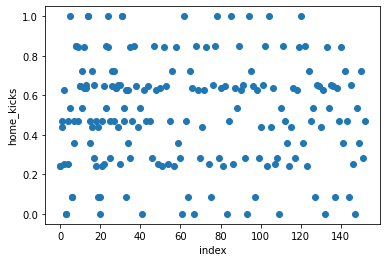

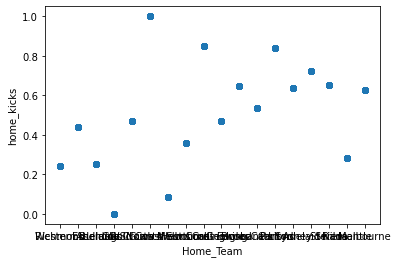

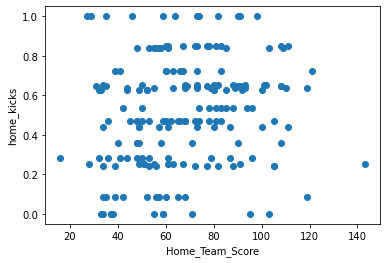

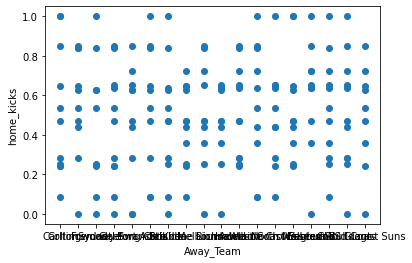

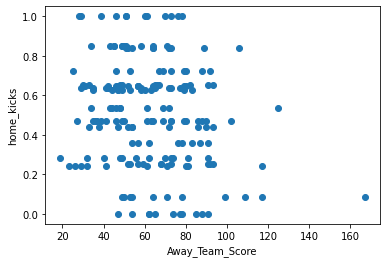

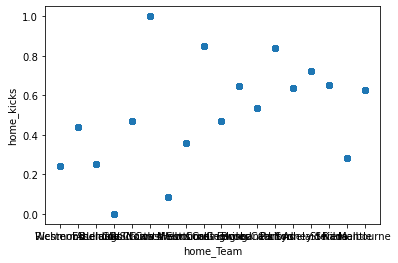

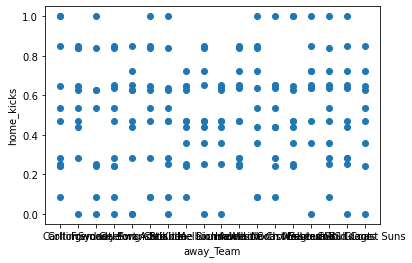

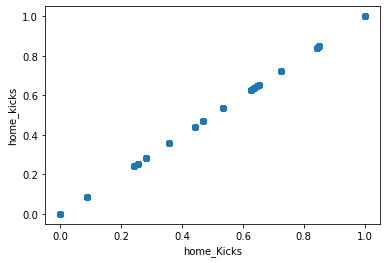

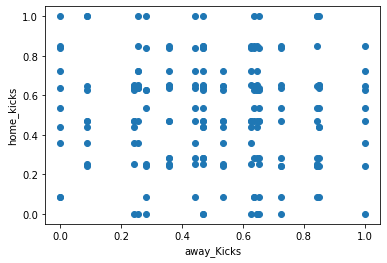

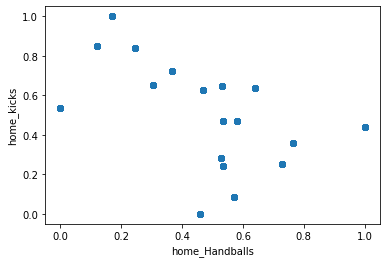

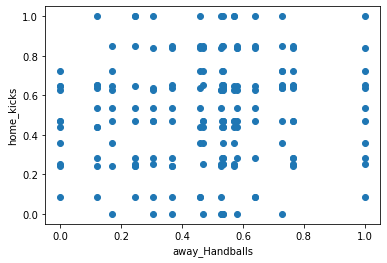

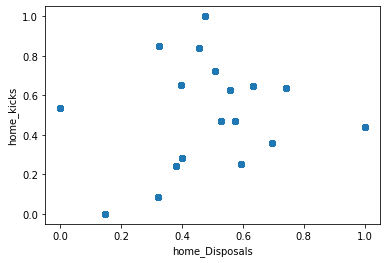

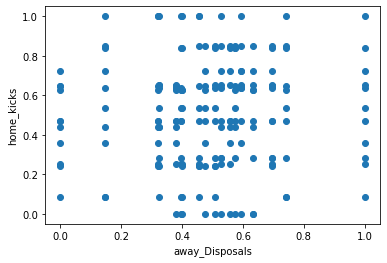

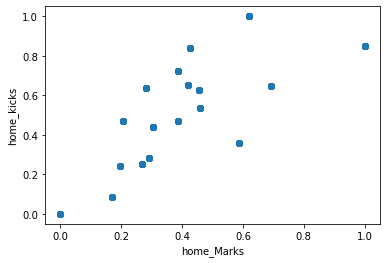

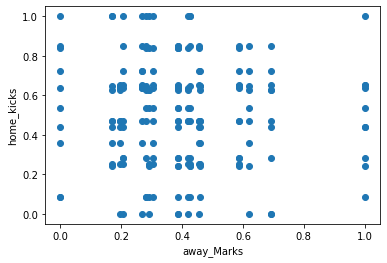

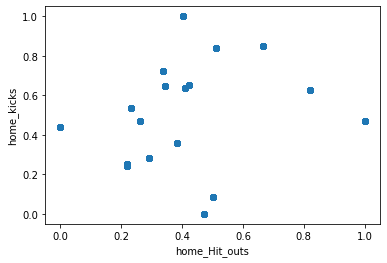

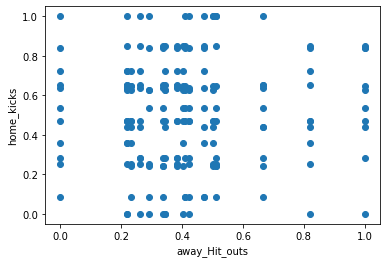

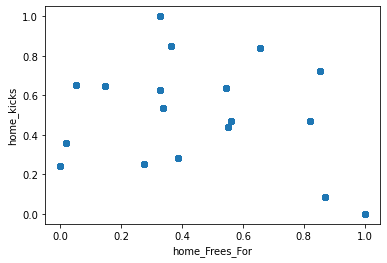

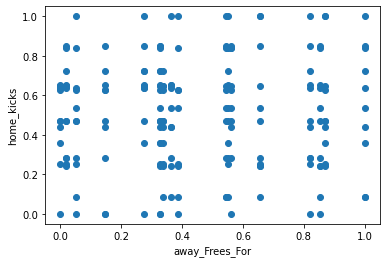

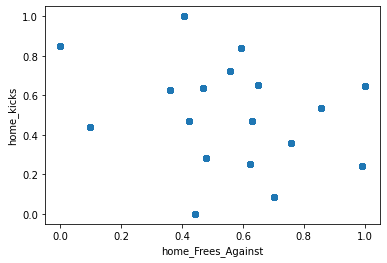

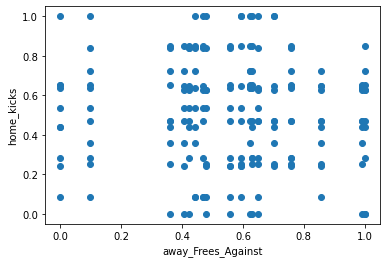

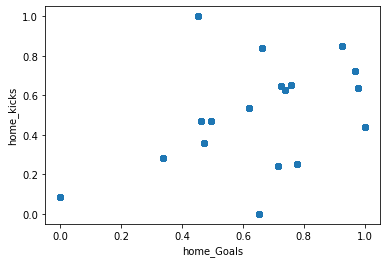

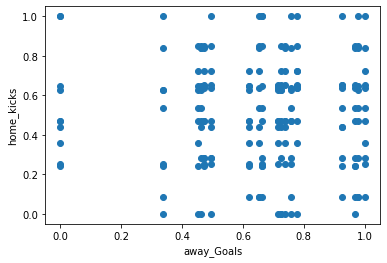

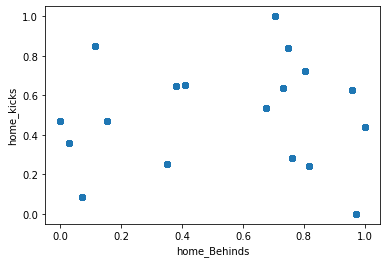

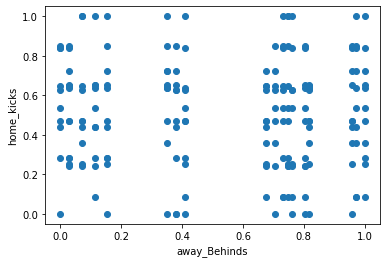

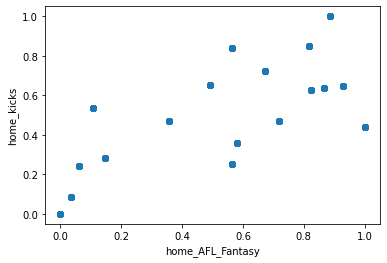

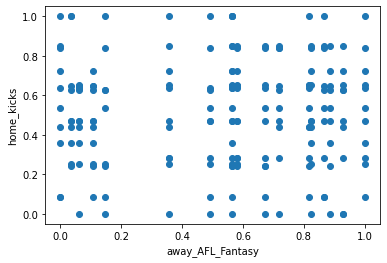

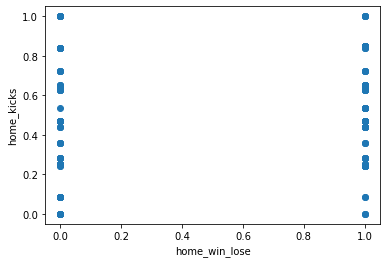

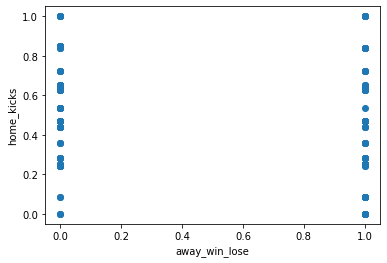

In [20]:
for column in df.columns:
    plt.scatter(x=df[column], y=df["home_Kicks"])
    plt.xlabel(column)
    plt.ylabel("home_kicks")
    plt.show()